In [1]:
import time
start =  time.time()

In [3]:
import time
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import PyUber
from datetime import datetime, timedelta
import glob
import os

start =  time.time()

def main():
    spices = SQL_DataFrame(sql)
    spices.to_csv('spices.csv', index=False)
    
def convert_to_date(df, column1='MEAS_SET_DATA_COLLECT_DATE', column2='LOT_DATA_COLLECT_DATE', \
                    column3='CURRENT_MOVEIN_DATE', column4='END_DATE'):
    if column1 in df.columns:
        df[column1] = pd.to_datetime(df[column1])
    if column2 in df.columns:
        df[column2] = pd.to_datetime(df[column2])
    if column3 in df.columns:
        df[column3] = pd.to_datetime(df[column3])
    if column4 in df.columns:
        df[column4] = pd.to_datetime(df[column4])
    return df

def SQL_DataFrame(sql, source='D1D_PROD_XEUS'):
    conn = PyUber.connect(source)
    df = pd.read_sql(sql, conn)
    return df

sql="""
SELECT  DISTINCT 
          a1.entity AS entity
         ,a5.value AS chart_value
         ,To_Char(a0.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS lot_data_collect_date
         ,a3.measurement_set_name AS measurement_set_name
         ,To_Char(a3.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS meas_set_data_collect_date
         ,a2.monitor_type AS monitor_type
         ,a3.parameter_class AS parameter_class
         ,a2.monitor_set_name AS monitor_set_name
         ,a0.lotoperkey AS lotoperkey
         ,a5.incontrol_flag AS incontrol_flag
         ,a5.standard_flag AS chart_pt_standard_flag
         ,a10.centerline AS centerline
         ,a10.lo_control_lmt AS lo_control_lmt
         ,a10.up_control_lmt AS up_control_lmt
         ,a5.chart_type AS chart_type
         ,a5.spc_chart_subset AS spc_chart_subset
         ,a2.test_name AS test_name
         ,a3.parameter_header AS parameter_header
         ,a2.module AS module
FROM 
P_SPC_MEASUREMENT_SET a3
INNER JOIN P_SPC_SESSION a2 ON a2.spcs_id = a3.spcs_id
LEFT JOIN P_SPC_LOT a0 ON a0.spcs_id = a2.spcs_id
INNER JOIN P_SPC_ENTITY a1 ON a2.spcs_id = a1.spcs_id AND a1.entity_sequence=1
LEFT JOIN P_SPC_CHART_POINT a5 ON a5.spcs_id = a3.spcs_id AND a5.measurement_set_name = a3.measurement_set_name
LEFT JOIN P_SPC_CHART_LIMIT a10 ON a10.chart_id = a5.chart_id AND a10.limit_id = a5.limit_id
WHERE
              (a1.entity LIKE 'LAT%' 
              OR a1.entity LIKE 'PAT%')
 AND      a5.value Is Not Null  
 AND      a3.data_collection_time >= TRUNC(SYSDATE) - {} 
 AND      a3.data_collection_time <= TRUNC(SYSDATE) - {} 
 AND      a2.monitor_type = 'TOOL MONITOR' 
 AND      a3.parameter_class = 'DEFECT_PARTICLE' 
 AND      a5.spc_chart_subset = 'PARTICLE_SIZE=TOTAL_ADDERS'
"""

sql2= '''SELECT 
          e.entity AS entity
         ,ea.attribute_value AS attribute_value
         ,e.ceid AS ceid
         ,ea.attribute_name AS attribute_name
         ,e.rev_module AS rev_module
FROM 
F_ENTITY e
LEFT JOIN F_ENTITYATTRIBUTE ea ON ea.entity = e.entity AND ea.history_deleted_flag='N'
WHERE
              (e.entity Like 'LAT%' 
              OR e.entity Like 'PAT%')
 AND      ea.attribute_name Like 'PM_Counter' 
ORDER BY
           1 Asc'''


# AND      

#if __name__ == "__main__": main()

# SAVE DATA IN BULK
DEPRECATED: NOW I LIKE ONE LARGE FILE

In [4]:
#pasts = [210,  270, 300, 330, 360, 390, 420, 450]
pasts = [0]

start =  time.time()

for past in pasts:
    
    try:
        assert len(tool_r)>0
        print('already have tool_r')
    except:
        tool_r = SQL_DataFrame(sql2)
        tool_r['ATTRIBUTE_VALUE'] = tool_r['ATTRIBUTE_VALUE'].astype(int)
        tools = pd.pivot_table(tool_r, values = 'ATTRIBUTE_VALUE', index = ['REV_MODULE', 'CEID' ,'ENTITY'], columns = 'ATTRIBUTE_NAME')
        tools = tools.reset_index()
        tools.set_index(['ENTITY'], inplace = True)

    ss = SQL_DataFrame(sql.format(str(past+90), str(past)))

    camp = os.getcwd()

    dstr = ss['LOT_DATA_COLLECT_DATE'].max()[:10]
    dstr
    fname = 'LAT.SPC.defect.' + dstr + '.csv'
    fname
    ss.to_csv(fname)
    

done1 = time.time()
print('done in: ', done1-start)

done in:  292.5599265098572


In [6]:
def get90d(ss, datestr): 
    end = pd.Timestamp(datestr) + timedelta(days=1)
    start = end - timedelta(days=90)
    try:
        ss = ss[(ss['LOT_DATA_COLLECT_DATE'] >= start) & (ss['LOT_DATA_COLLECT_DATE'] < end)]
    except:
        ss = convert_to_date(ss)
        ss = ss[(ss['LOT_DATA_COLLECT_DATE'] >= start) & (ss['LOT_DATA_COLLECT_DATE'] < end)]
    return ss

In [31]:
print(sql.format(str(past+90), str(past)))


SELECT  DISTINCT 
          a1.entity AS entity
         ,a5.value AS chart_value
         ,To_Char(a0.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS lot_data_collect_date
         ,a3.measurement_set_name AS measurement_set_name
         ,To_Char(a3.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS meas_set_data_collect_date
         ,a2.monitor_type AS monitor_type
         ,a3.parameter_class AS parameter_class
         ,a2.monitor_set_name AS monitor_set_name
         ,a0.lotoperkey AS lotoperkey
         ,a5.incontrol_flag AS incontrol_flag
         ,a5.standard_flag AS chart_pt_standard_flag
         ,a10.centerline AS centerline
         ,a10.lo_control_lmt AS lo_control_lmt
         ,a10.up_control_lmt AS up_control_lmt
         ,a5.chart_type AS chart_type
         ,a5.spc_chart_subset AS spc_chart_subset
         ,a2.test_name AS test_name
         ,a3.parameter_header AS parameter_header
         ,a2.module AS module
FROM 
P_SPC_MEASUREMENT_SET a3
INNER JOIN P_SPC_SESSION 

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE


859.6174228191376


'2021-01-06'

In [31]:
ss.head()

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
0,LAT424_PM1,1.000000,2020-12-28 22:19:43,LAT.DSA_PST.74.DER,2020-12-28 22:19:43,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.884135e+09,Y,Y,1.0,0.0,4.5,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATRTCPST,PARTICLE_SIZE,LAT
1,LAT424_PM1,2.000000,2020-11-22 18:07:10,LAT.DSA_PST.74.DER,2020-11-22 18:07:10,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.786187e+09,Y,Y,1.0,0.0,4.5,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATRTCPST,PARTICLE_SIZE,LAT
2,LAT410_PM1,0.000000,2021-01-02 10:49:33,LAT.DSA_PST.74.DER,2021-01-02 10:49:33,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.896305e+09,Y,N,1.0,0.0,4.5,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATRTCPST,PARTICLE_SIZE,LAT
3,PAT422_PM1,0.000000,2021-01-02 22:46:45,LAT.DSA_PST.74.DER,2021-01-02 22:46:45,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.895342e+09,Y,Y,1.0,0.0,4.5,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATRTCPST,PARTICLE_SIZE,LAT
4,PAT470_PM1,2.333333,2021-01-05 15:53:50,LAT.DSA_PST.74.DER,2021-01-05 15:53:50,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.897961e+09,Y,Y,1.0,0.0,4.5,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,4LATRTCPST,PARTICLE_SIZE,LAT


In [25]:
fname = 'LAT.SPC.defect.' + dstr + '.csv'
ss.to_csv(fname)

In [16]:
ss[ss['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS'].median()

CHART_VALUE       1.000000e+00
LOTOPERKEY        2.704012e+09
CENTERLINE        1.010000e+00
LO_CONTROL_LMT    0.000000e+00
UP_CONTROL_LMT    3.200000e+00
dtype: float64

In [36]:
tool_r = SQL_DataFrame(sql2)
tool_r['ATTRIBUTE_VALUE'] = tool_r['ATTRIBUTE_VALUE'].astype(int)
tools = pd.pivot_table(tool_r, values = 'ATTRIBUTE_VALUE', index = ['REV_MODULE', 'CEID' ,'ENTITY'], columns = 'ATTRIBUTE_NAME')
tools = tools.reset_index()
tools.set_index(['ENTITY'], inplace = True)
#tools[tools['ENTITY'] == 'LATXX']['REV_MODULE'].values[0]

camp = os.getcwd()

In [13]:
ss.head()

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
0,PAT436_PM3,0.0,2020-05-23 09:03:31,TGR.DSA_PST.74.DER,2020-05-23 09:03:31,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.311490e+09,Y,N,0.33,0.0,1.1,MAX,PARTICLE_SIZE=TOTAL_ADDERS,4LATNTSSPS,PARTICLE_SIZE,LAT
1,LAT426_PM3,0.0,2020-05-11 07:29:16,LAT.DSA_PST.76.DER,2020-05-11 07:29:16,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.76.MON,2.319861e+09,Y,Y,1.01,0.0,3.2,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,6LATNTFTPSSPST,PARTICLE_SIZE,LAT
2,LAT426_PM3,0.0,2020-05-11 07:29:22,LAT.DSA_PST.76.DER,2020-05-11 07:29:22,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.76.MON,2.319861e+09,Y,Y,1.01,0.0,3.2,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,6LATNTFTPSSPST,PARTICLE_SIZE,LAT
3,PAT454_PM5,0.0,2020-05-11 06:14:34,LAT.DSA_PST.76.DER,2020-05-11 06:14:34,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.76.MON,2.320653e+09,Y,Y,1.01,0.0,3.2,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,6LATNTSSPS,PARTICLE_SIZE,LAT
4,PAT454_PM5,0.0,2020-05-11 06:14:41,LAT.DSA_PST.76.DER,2020-05-11 06:14:41,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.76.MON,2.320653e+09,Y,Y,1.01,0.0,3.2,X-BAR,PARTICLE_SIZE=TOTAL_ADDERS,6LATNTSSPS,PARTICLE_SIZE,LAT


See next cell for better version
VERSION 2. MARCH 2021

In [37]:

sta=pd.DataFrame()
#csvs = glob.glob('training_data/LAT*.csv')
#for fnode in csvs:
if 1==1:
    #dstr = fnode.split('.')[-2]
    #ss = SQL_DataFrame(sql)
    entities = ss.ENTITY.unique()
    for entity in entities:
        #entity=entities[0]
        try:
            fname = tools.loc[entity]['REV_MODULE']+'.TA.'+entity+'.'+dstr
        except:
            fname = 'NONE.TA.'+entity+'.'+dstr
        sst = ss[ss['ENTITY']==entity]
        st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

        st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
        st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': fname})
        st.index = pd.to_datetime(st.t)
        st.drop(['t'], axis=1, inplace = True)
        st=st.sort_index()
        st=st.resample('3D').mean()

        st=st.interpolate(method='linear')
        st=np.log(st+1)
        st = st[len(st)-20:]
        if len(st)<20: continue
        
        if 1==1: #don't plot
            fig = plt.figure()
            ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
            #ax = plt.subplot(111)
            ax.plot(st, 'o')
            ax.set_xlabel('date')
            ax.set_ylabel('TA')
            ax.set_xticks(ax.get_xticks()[::3])
            #plt.title('title')
            ax.legend([entity+': '+dstr])
            fig.savefig('figs/'+fname+'.png')
            plt.close()
            st = st.reset_index().T.drop('t')

        #st = st.reset_index().T.drop('t')
        if sta.empty: sta=st
        else: sta = sta.append(st)
            


# Make figures from recent pull in ss variable


In [57]:
# Make sure we got the parts we need
assert len(tools)>0
start=time.time()

sta=pd.DataFrame()
csvs = glob.glob('training_data/LAT.SPC*.csv')
for fnode in csvs:
    #if 1==1:
    ss = pd.read_csv(fnode)
    dstr = fnode.split('.')[-2]
    entities = ss.ENTITY.unique()
    for entity in entities:
        #entity=entities[0]
        try:
            fname = tools.loc[entity]['REV_MODULE']+'.TA.'+entity+'.'+dstr
        except:
            fname = 'NONE.TA.'+entity+'.'+dstr
        sst = ss[ss['ENTITY']==entity]
        st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

        st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
        st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': fname})
        st.index = pd.to_datetime(st.t)
        st.drop(['t'], axis=1, inplace = True)
        st=st.sort_index()
        st=st.resample('3D').mean()

        st=st.interpolate(method='linear')
        st=np.log(st+1)
        st = st[len(st)-20:]
        if len(st)<20: continue
        
        if 1==2: #do plot
            fig = plt.figure()
            ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
            #ax = plt.subplot(111)
            ax.plot(st, 'o')
            ax.set_xlabel('date')
            ax.set_ylabel('TA')
            ax.set_xticks(ax.get_xticks()[::3])
            #plt.title('title')
            ax.legend([entity+': '+dstr])
            fig.savefig('figs/'+fname+'.png')
            plt.close()
            
        
        st = st.reset_index().T.drop('t')
        if sta.empty: sta=st
        else: sta = sta.append(st)
        
            
print('time taken: ', time.time()-start)

time taken:  45.5408136844635


# Make figures from saved csv files

More prudent

In [12]:
# Make sure we got the parts we need
assert len(tools)>0
start=time.time()

snapdates = ['2021-04-20']
ssb = pd.read_csv('LAT.SPC.defect.2021-04-23.csv')

sta=pd.DataFrame()
csvs = glob.glob('training_data/LAT.SPC*.csv')
for dstr in snapdates:
    ss = get90d(ssb, dstr)
    
    entities = ss.ENTITY.unique()
    for entity in entities:
        #entity=entities[0]
        try:
            fname = tools.loc[entity]['REV_MODULE']+'.TA.'+entity+'.'+dstr
        except:
            fname = 'NONE.TA.'+entity+'.'+dstr
        sst = ss[ss['ENTITY']==entity]
        st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

        st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
        st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': fname})
        st.index = pd.to_datetime(st.t)
        st.drop(['t'], axis=1, inplace = True)
        st=st.sort_index()
        st=st.resample('3D').mean()

        st=st.interpolate(method='linear')
        st=np.log(st+1)
        st = st[len(st)-20:]
        if len(st)<20: continue
        
        if 1==1: #do plot
            fig = plt.figure()
            ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
            #ax = plt.subplot(111)
            ax.plot(st, 'o')
            ax.set_xlabel('date')
            ax.set_ylabel('TA')
            ax.set_xticks(ax.get_xticks()[::3])
            #plt.title('title')
            ax.legend([entity+': '+dstr])
            fig.savefig('figs/'+fname+'.png')
            plt.close()
            
        
        st = st.reset_index().T.drop('t')
        if sta.empty: sta=st
        else: sta = sta.append(st)
        
            
print('time taken: ', time.time()-start)

time taken:  30.61734127998352


In [11]:
len(sta)

'C:\\Users\\narju\\OneDrive - Intel Corporation\\Documents\\Training\\python\\intel\\SPC_SNOOP'

In [59]:
sta = sta.rename_axis('key')

In [58]:
sta.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
DE-PAT-FTA.TA.LAT426_PM3.2020-02-11,1.76766,1.74297,1.71765,1.69168,1.66501,1.63761,1.60944,1.47908,1.32914,1.15268,0.93827,0.664976,0.287682,0.693147,0.510826,0.287682,0.405465,0.405465,0.405465,0
DE-PAT-FTA.TA.LAT426_PM3.2020-03-12,0.93827,0.664976,0.287682,0.693147,0.287682,0,0.693147,0,0.693147,0,0,1.38629,0.693147,0.693147,0.693147,0.916291,0,0,0,0
DE-LAT-TNC.TA.PAT408_PM5.2020-04-11,0.405465,0.367725,0.550046,0.405465,0.510826,0.847298,0.287682,0.154151,0.287682,0,0.606136,0.510826,0.287682,0.510826,0.336472,0.324496,0.312375,0.300105,0.287682,0.510826
DE-LAT.TA.LAT416_PM1.2020-04-11,1.04145,0.693147,1.09861,0.77319,1.17294,1.45775,1.01592,1.20397,0.510826,0.980829,1.38629,1.23676,1.004,0.980829,1.62706,0.980829,0.847298,0.510826,1.23296,0.929536
DE-PAT-BE.TA.PAT430_PM4.2020-04-11,0,0,0,0,0.405465,0.693147,0,0,0,0.76214,0,0.510826,0.287682,0,1.50408,0.693147,0,0.955511,0,0.81093


In [61]:
os.chdir(camp+'/training_data/figs/dirty')
dirtylist = glob.glob('*.png')
os.chdir(camp)

dirtylist=pd.Series(dirtylist)
dirtylist = dirtylist.apply(lambda x: x.split('.png')[0])
sta['is_dirty'] =  pd.Series(sta.index).apply(lambda x: (x in dirtylist.values)*1).values
sta.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,is_dirty
key,,,,,,,,,,,,,,,,,,,,,
DE-PAT-FTA.TA.LAT426_PM3.2020-02-11,1.76766,1.74297,1.71765,1.69168,1.66501,1.63761,1.60944,1.47908,1.32914,1.15268,...,0.664976,0.287682,0.693147,0.510826,0.287682,0.405465,0.405465,0.405465,0,0
DE-PAT-FTA.TA.LAT426_PM3.2020-03-12,0.93827,0.664976,0.287682,0.693147,0.287682,0,0.693147,0,0.693147,0,...,1.38629,0.693147,0.693147,0.693147,0.916291,0,0,0,0,0
DE-LAT-TNC.TA.PAT408_PM5.2020-04-11,0.405465,0.367725,0.550046,0.405465,0.510826,0.847298,0.287682,0.154151,0.287682,0,...,0.510826,0.287682,0.510826,0.336472,0.324496,0.312375,0.300105,0.287682,0.510826,0
DE-LAT.TA.LAT416_PM1.2020-04-11,1.04145,0.693147,1.09861,0.77319,1.17294,1.45775,1.01592,1.20397,0.510826,0.980829,...,1.23676,1.004,0.980829,1.62706,0.980829,0.847298,0.510826,1.23296,0.929536,0
DE-PAT-BE.TA.PAT430_PM4.2020-04-11,0,0,0,0,0.405465,0.693147,0,0,0,0.76214,...,0.510826,0.287682,0,1.50408,0.693147,0,0.955511,0,0.81093,0


In [62]:
sta['is_dirty'].sum()

192

In [63]:
sta.to_csv('cleaned_charts_training.csv')

In [6]:
entities = ss.ENTITY.unique()
for entity in entities:
    #entity=entities[0]
    sst = ss[ss['ENTITY']==entity]
    st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

    st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
    st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': 'TA'})
    st.index = pd.to_datetime(st.t)
    st.drop(['t'], axis=1, inplace = True)
    st=st.sort_index()
    st=st.resample('3D').mean()
    
    st=st.interpolate(method='linear')
    st=np.log(st+1)
    st = st[len(st)-20:]
    if len(st)<20: continue
    fname = 'TA~'+entity+'~'+dstr
    
    if 1==2: #don't plot
        fig = plt.figure()
        ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
        #ax = plt.subplot(111)
        ax.plot(st, 'o')
        ax.set_xlabel('date')
        ax.set_ylabel('TA')
        ax.set_xticks(ax.get_xticks()[::3])
        #plt.title('title')
        ax.legend([entity+': '+dstr])
        fig.savefig('figs/'+fname)
        plt.close()
    

In [50]:
csvs

['LAT.SPC.defect.2020-08-08.csv',
 'LAT.SPC.defect.2020-11-06.csv',
 'LAT.SPC.defect.2021-01-06.csv']

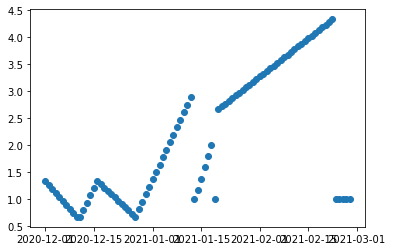

In [85]:
entities = ss.ENTITY.unique()
entity='PAT418_PM1'
sst = ss[ss['ENTITY']==entity]
st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': 'TA'})
st.index = pd.to_datetime(st.t)
st.drop(['t'], axis=1, inplace = True)
st=st.sort_index()
st=st.resample('1D').mean()
st=st.interpolate(method='linear')
#st=np.log(st+1)
#st = st[len(st)-60:]
plt.plot(st,'o')

In [43]:
    entity='PAT414_PM1'
    sst = ss[ss['ENTITY']==entity]
    st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

    st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
    st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': 'TA'})
    st.index = pd.to_datetime(st.t)
    st.drop(['t'], axis=1, inplace = True)
    st=st.sort_index()
    st=st.resample('3D').mean()
    
    st=st.interpolate(method='linear')
    st=np.log(st+1)
    st = st[len(st)-20:]

In [97]:
st.reset_index().T.drop('t').reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.980829,0.916291,0.847298,0.785929,0.720546,0.650588,0.873731,1.05605,0.74392,0.287682,0.510826,0.693147,0.77319,0.847298,0.847298,0.847298,0.847298,0.847298,0.847298,0.847298


In [75]:
ssd = pd.DataFrame(index: np)

40341

In [9]:
fname = 'figs/'+entity+'-'+dstr
print(fname)

figs/LAT01_PM2-2021-02-27


In [61]:
len(st)

60

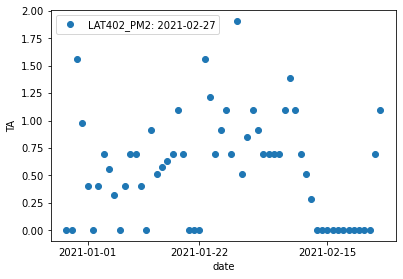

In [63]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#ax = plt.subplot(111)
ax.plot(st, 'o')
ax.set_xlabel('date')
ax.set_ylabel('TA')
ax.set_xticks(ax.get_xticks()[::3])
#plt.title('title')
ax.legend([entity+': '+dstr])
fig.savefig(fname)

In [74]:
len(st)

20

In [34]:
stl=np.log(st+1)

In [30]:
st

,TA
t,
2020-11-30 01:29:24,0.095310
2020-12-01 18:32:22,0.095310
2020-12-03 05:33:50,-2.302585
2020-12-04 15:27:30,5.242276
2020-12-04 17:08:23,0.741937
...,...
2021-02-15 18:21:31,-2.302585
2021-02-18 04:22:51,-2.302585
2021-02-20 15:57:45,-2.302585


In [88]:
st.values.T

array([[0.98082925, 0.91629073, 0.84729786, 0.78592891, 0.72054615,
        0.65058757, 0.87373112, 1.05605267, 0.74391951, 0.28768207,
        0.51082562, 0.69314718, 0.77318989, 0.84729786, 0.84729786,
        0.84729786, 0.84729786, 0.84729786, 0.84729786, 0.84729786]])

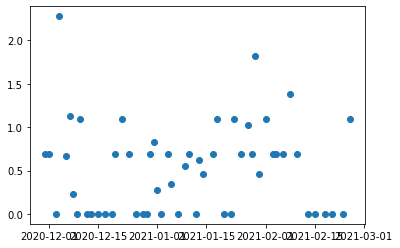

In [42]:
plt.plot(st,'o')

2020-12-03


In [15]:
fname.split('~')[1]

'PAT470_PM5'

In [10]:
569/4

142.25

In [18]:
taa = ss[ss['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']
taa=taa[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
taa=taa.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': 'TA'})
taa.index = pd.to_datetime(taa.t)
taa.drop(['t'], axis=1, inplace = True)
len(taa)
from scipy import stats
taac = taa[(np.abs(stats.zscore(taa)) < 3)]
#taa[(np.abs(stats.zscore(taa)) < 3)]

9523

In [21]:
from scipy import stats
taac = taa[(np.abs(stats.zscore(taa)) < 3)]

In [22]:
len(taac)

9492

In [23]:
taac.mean()

TA    3.69645
dtype: float64

In [24]:
taac.max()

TA    802.0
dtype: float64

In [25]:
len(taa)

9523

In [26]:
taa.mean()

TA    11.597644
dtype: float64

In [35]:
taac = taa[(np.abs(stats.zscore(taa)) < 0.5)]
len(taac)

9453

In [36]:
taac.mean()

TA    2.425272
dtype: float64

In [38]:
taac.max()

TA    150.0
dtype: float64

#LEARNING

Try both 
1. LSTM (recurrent, for sequential data)
2. Conv1D (image processing)


In [60]:
import keras
from keras.layers import Activation, Dense, Conv1D, LSTM

In [69]:
model = keras.models.Sequential()

In [72]:
model.add(LSTM(64))
model.add(LSTM(32))
model.add(LSTM(16))
model.add(LSTM(8))
model.add(LSTM(4))
model.add(LSTM(2))
#model.add(Activation('relu'))

model.add(Conv1D(32, kernel_size=3))
model.add(Activation('relu'))

model.add(Dense(32, input_dim=20))

model.add(Activation('relu'))

In [73]:
model.add(Dense(1))

In [74]:
model.layers

In [103]:
st.reset_index().T.drop('t')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TA~PAT414_PM1~2020-12-03,0.980829,0.916291,0.847298,0.785929,0.720546,0.650588,0.873731,1.05605,0.74392,0.287682,0.510826,0.693147,0.77319,0.847298,0.847298,0.847298,0.847298,0.847298,0.847298,0.847298


In [109]:
entity='PAT414_PM1'
fname = 'TA~'+entity+'~'+dstr
sst = ss[ss['ENTITY']==entity]
st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': fname})
st.index = pd.to_datetime(st.t)
st.drop(['t'], axis=1, inplace = True)
st=st.sort_index()
st=st.resample('3D').mean()

st=st.interpolate(method='linear')
st=np.log(st+1)
st = st[len(st)-20:]

In [105]:
sta=pd.DataFrame()
if sta.empty:
    print(True)

True


In [121]:
entities = ss.ENTITY.unique()
sta=pd.DataFrame()
for entity in entities:
    #entity=entities[0]
    sst = ss[ss['ENTITY']==entity]
    st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

    st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
    st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': fname})
    st.index = pd.to_datetime(st.t)
    st.drop(['t'], axis=1, inplace = True)
    st=st.sort_index()
    st=st.resample('3D').mean()
    
    st=st.interpolate(method='linear')
    st=np.log(st+1)
    st = st[len(st)-20:]
    if len(st)<20: continue
    fname = 'TA.'+entity+'.'+dstr

    if 1==1: #don't plot
        fig = plt.figure()
        ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
        #ax = plt.subplot(111)
        ax.plot(st, 'o')
        ax.set_xlabel('date')
        ax.set_ylabel('TA')
        ax.set_xticks(ax.get_xticks()[::3])
        #plt.title('title')
        ax.legend([entity+': '+dstr])
        fig.savefig('figs/'+fname)
        plt.close()
        st = st.reset_index().T.drop('t')
    
    st = st.reset_index().T.drop('t')
    if sta.empty: sta=st
    else: sta = sta.append(st)


In [111]:
st1 = st.reset_index().T.drop('t')

In [112]:
entity='PAT414_PM2'
fname = 'TA~'+entity+'~'+dstr
sst = ss[ss['ENTITY']==entity]
st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': fname})
st.index = pd.to_datetime(st.t)
st.drop(['t'], axis=1, inplace = True)
st=st.sort_index()
st=st.resample('3D').mean()

st=st.interpolate(method='linear')
st=np.log(st+1)
st = st[len(st)-20:]
st2 = st.reset_index().T.drop('t')

In [113]:
st1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TA~PAT414_PM1~2020-12-03,0.980829,0.916291,0.847298,0.785929,0.720546,0.650588,0.873731,1.05605,0.74392,0.287682,0.510826,0.693147,0.77319,0.847298,0.847298,0.847298,0.847298,0.847298,0.847298,0.847298


In [114]:
st2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TA~PAT414_PM2~2020-12-03,0.847298,1.09861,1.29928,1.46634,1.12601,0.606136,1.60944,0.980829,1.06087,1.13498,1.20397,1.34373,1.46634,1.23676,0.93827,0.510826,0.606136,0.693147,0.510826,0.882389


In [115]:
st1.append(st2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TA~PAT414_PM1~2020-12-03,0.980829,0.916291,0.847298,0.785929,0.720546,0.650588,0.873731,1.05605,0.74392,0.287682,0.510826,0.693147,0.77319,0.847298,0.847298,0.847298,0.847298,0.847298,0.847298,0.847298
TA~PAT414_PM2~2020-12-03,0.847298,1.09861,1.29928,1.46634,1.12601,0.606136,1.60944,0.980829,1.06087,1.13498,1.20397,1.34373,1.46634,1.23676,0.93827,0.510826,0.606136,0.693147,0.510826,0.882389


In [122]:
st

,TA~PAT470_PM5~2020-12-03
t,
2020-10-22,0.693147
2020-10-25,0.000000
2020-10-28,0.000000
2020-10-31,0.000000
2020-11-03,0.000000
2020-11-06,0.000000
2020-11-09,0.000000
2020-11-12,0.000000


In [123]:
sta.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TA~PAT470_PM5~2020-12-03,0.510826,1.09861,1.1421,1.18377,0.287682,0.510826,0.733969,0.287682,0.980829,0.980829,0.980829,1.29928,0.510826,0.287682,0.980829,1.0116,1.04145,0.733969,0.287682,0.77319
TA~PAT420_PM5~2020-12-03,0.510826,0.980829,0.980829,0.847298,0.510826,0.693147,1.09861,4.51725,0.510826,0.405465,0.693147,0.693147,0.693147,0.405465,0.405465,0.77319,0.847298,0.510826,1.06087,0.510826
TA~LAT424_PM4~2020-12-03,0.575364,0.693147,0.693147,0.693147,0.847298,0,0,0.77319,0.510826,0.405465,0.693147,0.154151,0.405465,0.287682,1.02165,0.287682,0.405465,0.459532,0.510826,0.510826
TA~PAT438_PM3~2020-12-03,0.77319,0.287682,0.154151,1.67398,0.962811,0.847298,0.154151,0.693147,0.287682,0.510826,0.287682,0.510826,0.510826,0.916291,0.980829,0.929536,0.287682,1.20397,0.606136,0.980829
TA~LAT418_PM4~2020-12-03,0.650588,0.510826,0.893818,1.17007,1.38629,0.916291,0.287682,0,0.299517,0.529694,0.716678,1.08797,1.35812,1.27474,1.18377,1.29928,1.13275,0.93282,1.01915,1.09861


In [124]:
len(sta)

154

In [125]:
ss1=ss

In [128]:
ss=pd.read_csv('training_data/LAT~SPC~defect~2020-07-06.csv')

In [180]:
import glob
sta=pd.DataFrame()
csvs = glob.glob('training_data/*.csv')
for fnode in csvs:
    dstr = fnode.split('~')[-1].split('.')[0]
    ss=pd.read_csv(fnode)
    entities = ss.ENTITY.unique()
    for entity in entities:
        #entity=entities[0]
        sst = ss[ss['ENTITY']==entity]
        st = sst[sst['SPC_CHART_SUBSET'] == 'PARTICLE_SIZE=TOTAL_ADDERS']

        st=st[['LOT_DATA_COLLECT_DATE', 'CHART_VALUE']]
        st=st.rename(columns={'LOT_DATA_COLLECT_DATE': 't', 'CHART_VALUE': fname})
        st.index = pd.to_datetime(st.t)
        st.drop(['t'], axis=1, inplace = True)
        st=st.sort_index()
        st=st.resample('3D').mean()

        st=st.interpolate(method='linear')
        st=np.log(st+1)
        st = st[len(st)-20:]
        if len(st)<20: continue
        fname = 'TA~'+entity+'~'+dstr

        if 1==2: #don't plot
            fig = plt.figure()
            ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
            #ax = plt.subplot(111)
            ax.plot(st, 'o')
            ax.set_xlabel('date')
            ax.set_ylabel('TA')
            ax.set_xticks(ax.get_xticks()[::3])
            #plt.title('title')
            ax.legend([entity+': '+dstr])
            fig.savefig('figs/'+fname)
            plt.close()
            st = st.reset_index().T.drop('t')

        st = st.reset_index().T.drop('t')
        if sta.empty: sta=st
        else: sta = sta.append(st)

In [181]:
len(sta)

569

In [136]:
sta.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TA~PAT436_PM1~2020-12-03,0,0,0,0.693147,1.09861,0,0.223144,0.405465,0.559616,0.693147,0.559616,0.405465,0.223144,0,0,0,0,0,0,0
TA~PAT404_PM3~2020-12-03,0.864997,0.559616,0,0.405465,0.693147,0,0,0,0.693147,0.405465,0,0.619039,0.998529,0.85745,0.693147,0.693147,0.693147,0,0,0
TA~PAT430_PM1~2020-12-03,0.405465,0,0.693147,0.693147,0.693147,0.847298,0.980829,1.09861,0,0,0,0,0,0.693147,1.09861,0.916291,0.693147,0,0,0
TA~PAT402_PM1~2020-12-03,0,0.405465,0.693147,0.405465,0,0,0,0,0,0,0,0.405465,0.693147,0.405465,0,0.287682,0.510826,0.693147,0.693147,0.693147
TA~PAT402_PM2~2020-12-03,0.916291,0.693147,0,0,0,0,0,0.405465,0.693147,0.693147,0.693147,0.405465,0,0,0.405465,0.693147,1.09861,1.38629,0,2.19722


In [185]:
sta.index = sta.index.rename('chart')

In [2]:
import glob
dirtylist = glob.glob('training_data/figs/dirty/*.png')
cleanlist = glob.glob('training_data/figs/clean/*.png')

In [277]:
len(dirtylist) + len(cleanlist) == len(sta)

True

In [4]:
import pandas as pd

In [5]:
dirtylist = pd.Series(dirtylist)
dirtylist = dirtylist.apply(lambda x: x.split('\\')[-1].split('/')[-1].split('.')[0])

In [6]:
cleanlist = pd.Series(cleanlist)
cleanlist = cleanlist.apply(lambda x: x.split('\\')[-1].split('/')[-1].split('.')[0])

In [7]:
cleanlist

0       TA~LAT01_PM1~2020-07-06
1       TA~LAT01_PM1~2020-10-04
2       TA~LAT01_PM1~2020-12-03
3       TA~LAT01_PM2~2020-12-03
4       TA~LAT01_PM3~2020-07-06
                 ...           
488    TA~PAT470_PM1~2021-03-03
489    TA~PAT470_PM3~2020-12-03
490    TA~PAT470_PM3~2021-03-03
491    TA~PAT470_PM4~2020-12-03
492    TA~PAT470_PM5~2021-03-03
Length: 493, dtype: object

In [8]:
dirtylist

0      TA~LAT01_PM2~2020-07-06
1      TA~LAT01_PM2~2020-10-04
2      TA~LAT02_PM2~2020-07-06
3      TA~LAT02_PM2~2020-10-04
4     TA~LAT402_PM3~2020-10-04
                ...           
71    TA~PAT458_PM4~2021-03-03
72    TA~PAT468_PM4~2020-12-03
73    TA~PAT470_PM2~2021-03-03
74    TA~PAT470_PM4~2021-03-03
75    TA~PAT470_PM5~2020-12-03
Length: 76, dtype: object

In [160]:
a = sta.index[0]

In [211]:
sta['is_dirty'] =  pd.Series(sta.index).apply(lambda x: (x in dirtylist.values)*1).values

In [210]:
pd.Series(sta.index).apply(lambda x: (x in dirtylist.values)*1).values

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [189]:
dirtylist[0] in sta.index

True

In [176]:
dirtylist[0]

'TA~LAT01_PM2~2020-07-06'

In [177]:
sta.index[0]

'TA~PAT436_PM1~2020-12-03'

In [178]:
dstr = fnode.split('~')[-1].split('.')[0]

In [179]:
dstr

'2021-03-03'

In [191]:
sta.sort_index(inplace=True)

In [279]:
sta.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,is_dirty
chart,,,,,,,,,,,,,,,,,,,,,
TA~LAT01_PM1~2020-07-06,0.510826,0.287682,0,0.182322,0.336472,0.470004,0.587787,0.693147,0.559616,0.405465,...,0.510826,0.427444,0.336472,0.236389,0.125163,0,0.940983,1.41707,0.693147,0
TA~LAT01_PM1~2020-10-04,0.693147,1.44692,0.693147,0,1.38629,1.04145,0.693147,0.916291,1.09861,0.693147,...,1.09861,1.09861,1.09861,1.38629,0.860201,1.09861,0.916291,0.693147,1.09861,0
TA~LAT01_PM1~2020-12-03,0,0,0.154151,0.287682,0,0.860201,1.31568,0.928339,0.287682,0.693147,...,0.693147,0.405465,0,1.38629,0.916291,0,0.693147,0.405465,0,0
TA~LAT01_PM2~2020-07-06,1.37978,1.42165,1.46183,1.50046,1.53766,1.57352,1.60814,1.6416,1.67398,0.847298,...,1.0349,1.08619,1.13498,1.1815,1.22595,1.26851,1.30933,1.34855,1.38629,1
TA~LAT01_PM2~2020-10-04,1.22378,1.38629,0,0.693147,1.09861,1.38629,1.26224,1.12059,0.955511,0.757686,...,0.441833,0.367725,0.287682,0.200671,0.105361,0,3.79129,4.47309,4.87474,1


In [194]:
dirtylist[0] in sta.index

True

In [198]:
sta.index[3]

'TA~LAT01_PM2~2020-07-06'

In [201]:
type(dirtylist)

pandas.core.series.Series

In [204]:
sta.index[3] in dirtylist.values

True

In [213]:
sta.to_csv('training_data/cleaned_charts_training.csv')

In [14]:
sql2= '''SELECT 
          e.entity AS entity
         ,ea.attribute_value AS attribute_value
         ,e.ceid AS ceid
         ,ea.attribute_name AS attribute_name
         ,e.rev_module AS rev_module
FROM 
F_ENTITY e
LEFT JOIN F_ENTITYATTRIBUTE ea ON ea.entity = e.entity AND ea.history_deleted_flag='N'
WHERE
              (e.entity Like 'PAT%' 
              OR e.entity Like 'LAT%')
 AND      ea.attribute_name Like 'PM_Counter' 
ORDER BY
           1 Asc'''


In [15]:
tool_r = SQL_DataFrame(sql2)

In [16]:
tool_r.head()

,ENTITY,ATTRIBUTE_VALUE,CEID,ATTRIBUTE_NAME,REV_MODULE
0,LAT01_PM1,51538,LATne,PMCCounter,DE-LAT
1,LAT01_PM1,1132,LATne,PMACounter,DE-LAT
2,LAT01_PM1,18646,LATne,PMBCounter,DE-LAT
3,LAT01_PM1,0,LATne,PMFCounter,DE-LAT
4,LAT01_PM1,0,LATne,PMGCounter,DE-LAT


In [17]:
tool_r['ATTRIBUTE_VALUE'] = tool_r['ATTRIBUTE_VALUE'].astype(int)

In [18]:
tools = pd.pivot_table(tool_r, values = 'ATTRIBUTE_VALUE', index = ['REV_MODULE', 'CEID' ,'ENTITY'], columns = 'ATTRIBUTE_NAME')

In [311]:
type(table.index[0])

int

In [19]:
tools.head()

ATTRIBUTE_NAME              PMACounter  PMBCounter  PMCCounter  PMDCounter  \
REV_MODULE CEID  ENTITY                                                      
DE-LAT     LATne LAT01_PM1        1132       18646       51538       77064   
                 LAT01_PM2        3313       20142       39283        3413   
                 LAT01_PM3        1254       21950       50485       42488   
                 LAT01_PM4        1524        8471       51262       66403   
                 LAT02_PM1         688        4116       39667       59959   

ATTRIBUTE_NAME              PMECounter  PMFCounter  PMGCounter  
REV_MODULE CEID  ENTITY                                         
DE-LAT     LATne LAT01_PM1           0           0           0  
                 LAT01_PM2           0           0           0  
                 LAT01_PM3           0           0           0  
                 LAT01_PM4           0           0           0  
                 LAT02_PM1           0           0           0

In [20]:
tools = tools.reset_index()
tools[tools['ENTITY'] == 'LAT01_PM1']['REV_MODULE']

0    DE-LAT
Name: REV_MODULE, dtype: object

In [21]:
tools.head()

ATTRIBUTE_NAME,REV_MODULE,CEID,ENTITY,PMACounter,PMBCounter,PMCCounter,PMDCounter,PMECounter,PMFCounter,PMGCounter
0,DE-LAT,LATne,LAT01_PM1,1132,18646,51538,77064,0,0,0
1,DE-LAT,LATne,LAT01_PM2,3313,20142,39283,3413,0,0,0
2,DE-LAT,LATne,LAT01_PM3,1254,21950,50485,42488,0,0,0
3,DE-LAT,LATne,LAT01_PM4,1524,8471,51262,66403,0,0,0
4,DE-LAT,LATne,LAT02_PM1,688,4116,39667,59959,0,0,0


In [304]:
d0 = dirtylist[0].split('~')

In [306]:
d0[0]+'~DE-LAT~'+'~'.join(d0[1:])

'TA~DE-LAT~LAT01_PM2~2020-07-06'

In [309]:
'DE-LAT~'+ dirtylist[0]

'DE-LAT~TA~LAT01_PM2~2020-07-06'

In [335]:
dirtylist[0]

'TA~LAT01_PM2~2020-07-06'

In [344]:
tools[tools['ENTITY'] == dirtylist[0].split('~')[1]]['REV_MODULE'].values[0]

'DE-LAT'

In [346]:
tools[tools['ENTITY'] == dirtylist[0].split('~')[1]]['REV_MODULE'].values[0] +'~'+ dirtylist[0]

'DE-LAT~TA~LAT01_PM2~2020-07-06'

In [24]:
import shutil

In [351]:
for dirty in dirtylist:
    src = 'training_data/figs/dirty/' + dirty + '.png'
    dst = 'figs/dirty/' + tools[tools['ENTITY'] == dirty.split('~')[1]]['REV_MODULE'].values[0] +'~'+ dirty+'.png'
    shutil.copyfile(src, dst)

In [26]:
cleanlist

0       TA~LAT01_PM1~2020-07-06
1       TA~LAT01_PM1~2020-10-04
2       TA~LAT01_PM1~2020-12-03
3       TA~LAT01_PM2~2020-12-03
4       TA~LAT01_PM3~2020-07-06
                 ...           
488    TA~PAT470_PM1~2021-03-03
489    TA~PAT470_PM3~2020-12-03
490    TA~PAT470_PM3~2021-03-03
491    TA~PAT470_PM4~2020-12-03
492    TA~PAT470_PM5~2021-03-03
Length: 493, dtype: object

In [35]:
for clean in cleanlist:
    try: 
        src = 'training_data/figs/clean/' + clean + '.png'
        dst = 'figs/clean/' + tools[tools['ENTITY'] == clean.split('~')[1]]['REV_MODULE'].values[0] +'~'+ clean+'.png'
        #shutil.copyfile(src, dst)
    except:
        print(src)
        dst = 'figs/clean/NONE~' + clean+'.png'
        print(dst)
    shutil.copyfile(src, dst)

training_data/figs/clean/TA~PAT452_PM5~2020-12-03.png
figs/clean/NONE~TA~PAT452_PM5~2020-12-03.png
training_data/figs/clean/TA~PAT468_PM3~2020-12-03.png
figs/clean/NONE~TA~PAT468_PM3~2020-12-03.png


In [27]:
len(cleanlist)

493

In [28]:
len(tools)

178

In [29]:
len(tool_r)

1421

In [33]:
tools[tools['ENTITY'] == 'PAT468_PM2']

ATTRIBUTE_NAME,REV_MODULE,CEID,ENTITY,PMACounter,PMBCounter,PMCCounter,PMDCounter,PMECounter,PMFCounter,PMGCounter
138,DE-PAT-FTA,PATna,PAT468_PM2,972,26254,26254,26254,26254,26254,26254


In [1]:
import glob
dirtylist = glob.glob('training_data/figs/dirty/*.png')
cleanlist = glob.glob('training_data/figs/clean/*.png')

In [7]:
dirty = dirtylist[0]

In [8]:
dirty

'training_data/figs/dirty\\DE-LAT-NVE~TA~LAT424_PM2~2020-07-06.png'

In [9]:
dirty.replace('~', '.')

'training_data/figs/dirty\\DE-LAT-NVE.TA.LAT424_PM2.2020-07-06.png'

In [2]:
import shutil

In [12]:
for dirty in dirtylist:
    src=dirty
    dst=dirty.replace('~', '.')
    #print(src)
    #print(dst)
    shutil.move(src, dst)
    

In [15]:
for clean in cleanlist:
    src=clean
    dst=clean.replace('~','.')
    #print(src)
    #print(dst)
    #break
    #shutil.move(src, dst)

In [3]:
fs = glob.glob('training_data/LAT*.csv')

In [4]:
fs

['training_data\\LAT.SPC.defect.2020-07-06.csv',
 'training_data\\LAT~SPC~defect~2020-10-04.csv',
 'training_data\\LAT~SPC~defect~2020-12-03.csv',
 'training_data\\LAT~SPC~defect~2021-03-03.csv']

In [5]:
import os
os.getcwd()

'C:\\Users\\narju\\OneDrive - Intel Corporation\\Documents\\Training\\python\\intel\\SPC_SNOOP'

In [6]:
for f in fs:
    shutil.move(f, f.replace('~', '.'))

SyntaxError: invalid syntax (<ipython-input-48-67c751a92db9>, line 1)

In [17]:
past = 30
print(sql.format(str(past+90), str(past)))


SELECT  DISTINCT 
          a1.entity AS entity
         ,a5.value AS chart_value
         ,To_Char(a0.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS lot_data_collect_date
         ,a3.measurement_set_name AS measurement_set_name
         ,To_Char(a3.data_collection_time,'yyyy-mm-dd hh24:mi:ss') AS meas_set_data_collect_date
         ,a2.monitor_type AS monitor_type
         ,a3.parameter_class AS parameter_class
         ,a2.monitor_set_name AS monitor_set_name
         ,a0.lotoperkey AS lotoperkey
         ,a5.incontrol_flag AS incontrol_flag
         ,a5.standard_flag AS chart_pt_standard_flag
         ,a10.centerline AS centerline
         ,a10.lo_control_lmt AS lo_control_lmt
         ,a10.up_control_lmt AS up_control_lmt
         ,a5.chart_type AS chart_type
         ,a5.spc_chart_subset AS spc_chart_subset
         ,a2.test_name AS test_name
         ,a3.parameter_header AS parameter_header
         ,a2.module AS module
FROM 
P_SPC_MEASUREMENT_SET a3
INNER JOIN P_SPC_SESSION 

In [20]:
assert len(tool_r)>0

In [19]:
lat=pd.read_csv('training_data/LAT.SPC.defect.2021-04-23.csv')
rex=pd.read_csv('training_data/REX.SPC.defect.2021-04-22.csv')

In [20]:
latrex = pd.concat([lat,rex])
#LATREX.SPC.defect.2021-04-22.csv
latrex.head()

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME_x,MEAS_SET_DATA_COLLECT_DATE_x,MONITOR_TYPE_x,PARAMETER_CLASS_x,MONITOR_SET_NAME_x,LOTOPERKEY_x,INCONTROL_FLAG_x,...,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,TEST_NAME,PARAMETER_HEADER,MODULE
0,LAT426_PM3,0.0,9/17/2019 17:45,LAT.DSA_TIN_PST.74.DER,9/17/2019 17:45,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_TIN_PST.74.MON,1.847755e+09,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LAT426_PM3,0.0,9/26/2019 09:09,LAT.DSA_TIN_PST.74.DER,9/26/2019 09:09,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_TIN_PST.74.MON,1.864650e+09,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PAT408_PM5,0.0,1/28/2020 11:31,LAT.DSA_TIN_PST.74.DER,1/28/2020 11:31,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_TIN_PST.74.MON,2.053656e+09,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LAT416_PM1,0.0,1/29/2020 05:08,LAT.DSA_PST.74.DER,1/29/2020 05:08,TOOL MONITOR,DEFECT_PARTICLE,LAT.DSA_PST.74.MON,2.053656e+09,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAT430_PM4,0.0,1/18/2020 21:06,PATBE.DSA_PST.76.DER,1/18/2020 21:06,TOOL MONITOR,DEFECT_PARTICLE,PATBE.DSA_PST.76.MON,2.053972e+09,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
rex.head()

,ENTITY,CHART_VALUE,LOT_DATA_COLLECT_DATE,MEASUREMENT_SET_NAME,MEAS_SET_DATA_COLLECT_DATE,MONITOR_TYPE,PARAMETER_CLASS,MONITOR_SET_NAME,LOTOPERKEY,INCONTROL_FLAG,CHART_PT_STANDARD_FLAG,CENTERLINE,LO_CONTROL_LMT,UP_CONTROL_LMT,CHART_TYPE,SPC_CHART_SUBSET,TEST_NAME,PARAMETER_HEADER,MODULE
0,REX01,0.0,5/2/2020 00:48,REXFE.DSA_PST.72.DER,5/2/2020 00:48,TOOL MONITOR,DEFECT_PARTICLE,REXFE.DSA_PST.72.MON,1169714064,N,Y,0.0,NaN,1.2,SUM,PARTICLE_SIZE=TOTAL_ADDERS,2REXLPPST4,PARTICLE_SIZE,REX FE
1,REX02,0.0,7/1/2020 16:19,REXFE.DSA_PST.72.DER,7/1/2020 16:19,TOOL MONITOR,DEFECT_PARTICLE,REXFE.DSA_PST.72.MON,1180020426,N,Y,0.0,NaN,1.2,SUM,PARTICLE_SIZE=TOTAL_ADDERS,2REXLPPST1,PARTICLE_SIZE,REX FE
2,REX412,0.0,8/19/2020 23:05,REXFE.DSA_PST.72.DER,8/19/2020 23:05,TOOL MONITOR,DEFECT_PARTICLE,REXFE.DSA_PST.72.MON,1180020426,N,Y,0.0,NaN,1.2,SUM,PARTICLE_SIZE=TOTAL_ADDERS,2REXLPPST4,PARTICLE_SIZE,REX FE
3,REX412,0.0,1/14/2021 14:33,REXFE.DSA_PST.72.DER,1/14/2021 14:33,TOOL MONITOR,DEFECT_PARTICLE,REXFE.DSA_PST.72.MON,1180020426,N,Y,0.0,NaN,1.2,SUM,PARTICLE_SIZE=TOTAL_ADDERS,2REXLPPST4,PARTICLE_SIZE,REX FE
4,REX02,0.0,7/28/2020 17:56,REXFE.DSA_PST.72.DER,7/28/2020 17:56,TOOL MONITOR,DEFECT_PARTICLE,REXFE.DSA_PST.72.MON,1180845151,N,Y,0.0,NaN,1.2,SUM,PARTICLE_SIZE=TOTAL_ADDERS,2REXLPPST3,PARTICLE_SIZE,REX FE


In [4]:

sql3 = '''SELECT  DISTINCT 
          z0.entity AS entity
         ,z0.config_level_2 AS config_level_2
FROM 
F_UE_Detail z0
WHERE
              (z0.entity LIKE  'PAT%'
OR z0.entity LIKE 'LAT%'
) 
 AND      z0.rollup_date >= SYSDATE - 1 '''

tool_r = SQL_DataFrame(sql3)

In [5]:
tool_r

,ENTITY,CONFIG_LEVEL_2
0,LAT01,DE-LAT
1,LAT01_PM1,DE-LAT
2,LAT01_PM2,DE-LAT
3,LAT01_PM3,DE-LAT
4,LAT01_PM4,DE-LAT
...,...,...
220,PAT478,DE-PATXD
221,PAT478_PM1,DE-PATXD
222,PAT478_PM2,DE-PATXD
223,PAT478_PM3,DE-PATXD


In [6]:
tools

NameError: name 'tools' is not defined

In [7]:
pd.Timestamp('2020-10-27')+timedelta(days=180)

Timestamp('2021-04-25 00:00:00')